In [65]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\survey_results_public.csv'
dataset = pd.read_csv(path)
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [67]:
dataset.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [68]:
df = dataset[['ResponseId', 'EdLevel', 'LanguageHaveWorkedWith', 'WorkExp', 'ConvertedCompYearly']]
df = df.dropna(subset=['ConvertedCompYearly'])
df = df.dropna(subset=['LanguageHaveWorkedWith'])
df['EdLevel'] = df['EdLevel'].astype('category')
df.head()

,ResponseId,EdLevel,LanguageHaveWorkedWith,WorkExp,ConvertedCompYearly
1,2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;Python,10.0,285000.0
2,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go,23.0,250000.0
3,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,7.0,156000.0
4,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;TypeScript,6.0,23456.0
5,6,Some college/university study without earning ...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,22.0,96828.0


In [69]:
unique_languages = set(x.strip() for my_list in df['LanguageHaveWorkedWith'].dropna() for x in my_list.split(';'))
unique_languages

{'APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zig'}

In [70]:
df.isna().sum()

ResponseId                    0
EdLevel                       0
LanguageHaveWorkedWith        0
WorkExp                   15295
ConvertedCompYearly           0
dtype: int64

In [71]:
data_for_langue = pd.Series([[] for _ in range(len(unique_languages))], index=unique_languages)

for i in range(df.shape[0]-1):
    curr_row = df.iloc[i]
    for j in unique_languages:
        if j in curr_row['LanguageHaveWorkedWith']:
            data_for_langue.at[j].append(curr_row['ConvertedCompYearly'])
        else:
            data_for_langue.at[j].append(pd.NA)

salary_per_langue = data_for_langue.to_frame(name="0")
salary_per_langue = salary_per_langue['0'].apply(pd.Series)
salary_per_langue["mean"] = salary_per_langue.mean(axis=1, skipna=True)
salary_per_langue["Language"] = [i for i in unique_languages]
salary_per_langue.T.head()


,Go,Nim,Erlang,Lisp,Prolog,Visual Basic (.Net),Crystal,Objective-C,Julia,SQL,...,OCaml,GDScript,MATLAB,Dart,Ada,Java,Kotlin,Lua,Python,Ruby
47879,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,16917.0,<NA>,<NA>,16917.0,<NA>,<NA>,<NA>,<NA>
47880,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,15752.0,<NA>,15752.0,<NA>,<NA>,<NA>,<NA>
47881,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,64254.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,64254.0,<NA>,<NA>,<NA>,<NA>
mean,131129.612927,715922.193798,278031.415709,389494.982047,702881.0,161144.725216,515074.875,246212.476309,280932.778055,100316.892805,...,448438.544715,224510.352612,146885.514102,106978.435031,1095432.256809,99720.06427,119503.318618,136249.019879,109210.72897,142087.526642
Language,Go,Nim,Erlang,Lisp,Prolog,Visual Basic (.Net),Crystal,Objective-C,Julia,SQL,...,OCaml,GDScript,MATLAB,Dart,Ada,Java,Kotlin,Lua,Python,Ruby


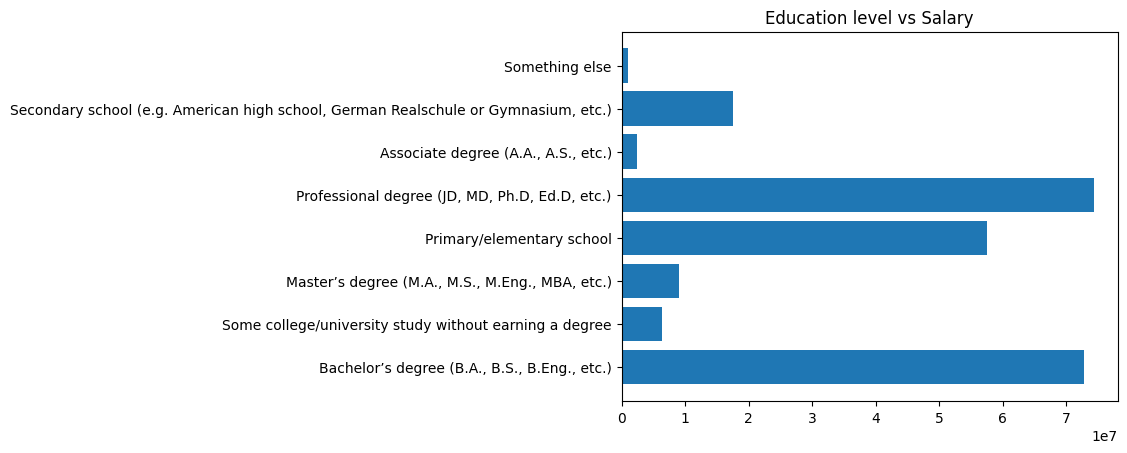

In [76]:
plt.rcParams.update({'font.size': 10})
plt.barh(y=df['EdLevel'], width=df['ConvertedCompYearly'])
plt.title('Education level vs Salary')
plt.show()

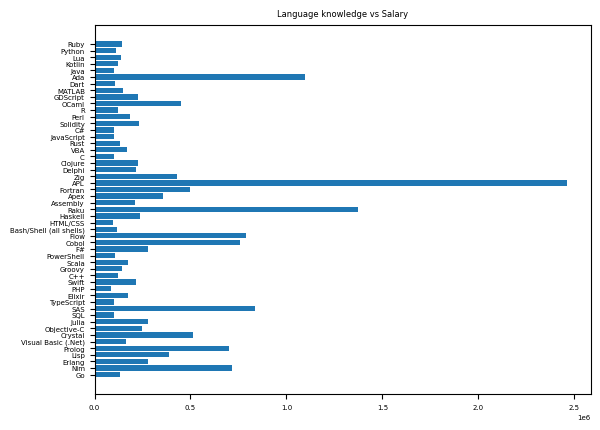

In [73]:
plt.rcParams.update({'font.size': 5})
plt.barh(y=salary_per_langue["Language"], width=salary_per_langue["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

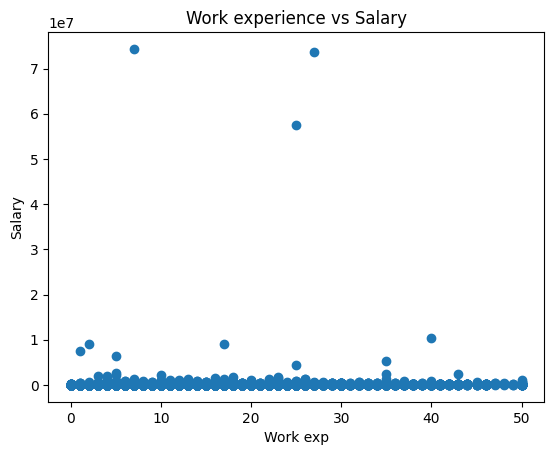

In [86]:
plt.rcParams.update({'font.size': 10})
plt.scatter(x=df['WorkExp'], y=df['ConvertedCompYearly'])
plt.title('Work experience vs Salary')
plt.xlabel("Work exp")
plt.ylabel("Salary")
plt.show()